## Imports

In [42]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from plotly.subplots import make_subplots

## Loading data

In [2]:
regions = pd.read_csv('../data/history_noc_regions.csv')

history_athlete_events = pd.read_csv('../data/history_athlete_events.csv')

with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    
    gender = pd.read_excel('../data/EntriesGender.xlsx')
    athletes = pd.read_excel('../data/Athletes.xlsx')
    teams = pd.read_excel('../data/Teams.xlsx')
    coaches = pd.read_excel('../data/Coaches.xlsx')
    medals = pd.read_excel('../data/Medals.xlsx')

### Regions

In [5]:
regions

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [6]:
regions.isna().sum()

NOC         0
region      3
notes     209
dtype: int64

In [7]:
regions[regions["region"].isna()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


### Historical data 

In [8]:
history_athlete_events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


We are only interested in **summer** olympics

In [9]:
history_athlete_events = history_athlete_events[history_athlete_events["Season"] == "Summer"]

In [10]:
history_athlete_events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN


In [11]:
history_athlete_events[history_athlete_events["NOC"] == "ARM"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
752,431,Narek Abgaryan,M,24.0,166.0,52.0,Armenia,ARM,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Flyweight,NaN
1696,943,Arman Adikyan,M,23.0,168.0,66.0,Armenia,ARM,2008 Summer,2008,Summer,Beijing,Wrestling,"Wrestling Men's Welterweight, Greco-Roman",NaN
2083,1158,Mamed Aghaev,M,28.0,177.0,84.0,Armenia,ARM,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Light-Heavyweight, Freestyle",NaN
2088,1162,Levon Aghasyan,M,21.0,193.0,75.0,Armenia,ARM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Triple Jump,NaN
4382,2497,Artur Aleksanyan,M,20.0,190.0,98.0,Armenia,ARM,2012 Summer,2012,Summer,London,Wrestling,"Wrestling Men's Heavyweight, Greco-Roman",Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254794,127543,Vardan Voskanyan,M,28.0,167.0,60.0,Armenia,ARM,2000 Summer,2000,Summer,Sydney,Judo,Judo Men's Extra-Lightweight,NaN
265305,132771,Hayk Yeghiazaryan,M,24.0,NaN,70.0,Armenia,ARM,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Lightweight,NaN
265306,132772,Tsolak Yeghishyan,M,25.0,177.0,88.0,Armenia,ARM,1996 Summer,1996,Summer,Atlanta,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN
265466,132847,Harutyun Yenokyan,M,23.0,176.0,88.0,Armenia,ARM,2008 Summer,2008,Summer,Beijing,Wrestling,"Wrestling Men's Light-Heavyweight, Freestyle",NaN


In [12]:
history_athlete_events.isna().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
dtype: int64

### Top performers in each Olympics

In [13]:
year_grouped_data = history_athlete_events.groupby(["Year", "City"])

top_athletes = {
    "year": [],
    "city": [],
    "athlete": [],
    "number_of_medals": [],
    "number_of_golds": [],
    "number_of_silvers": [],
    "number_of_bronzes": []
}

for (year, city),year_data in year_grouped_data:
    athlete_idx = year_data[~year_data["Medal"].isna()]['Name'].value_counts().idxmax()
    athlete_name = athlete_idx
    athlete_number_of_medals = len(year_data[year_data['Name'] == athlete_name])
    
    top_athletes["year"].append(year)
    top_athletes["city"].append(city)
    top_athletes["athlete"].append(athlete_name)
    top_athletes["number_of_medals"].append(athlete_number_of_medals)
    top_athletes["number_of_golds"].append(len(year_data[(year_data['Name'] == athlete_name) & (year_data["Medal"] == "Gold")]))
    top_athletes["number_of_silvers"].append(len(year_data[(year_data['Name'] == athlete_name) & (year_data["Medal"] == "Silver")]))
    top_athletes["number_of_bronzes"].append(len(year_data[(year_data['Name'] == athlete_name) & (year_data["Medal"] == "Bronze")]))



top_athletes = pd.DataFrame(top_athletes)
top_athletes

,year,city,athlete,number_of_medals,number_of_golds,number_of_silvers,number_of_bronzes
0,1896,Athina,Hermann Otto Ludwig Weingrtner,7,3,2,1
1,1900,Paris,"Irving Knott ""Irv"" Baxter",5,2,3,0
2,1904,St. Louis,Anton Heida,9,5,1,0
3,1906,Athina,Lon Ernest Moreaux,10,2,1,2
4,1908,London,"Thomas ""Ted"" Ranken",4,0,3,0
5,1912,Stockholm,Gustaf Vilhelm Carlberg,8,3,2,0
6,1920,Antwerpen,Lloyd Spencer Spooner,13,4,1,2
7,1924,Paris,"Viljo Eino ""Ville"" Ritola (Koukkari-)",6,4,2,0
8,1928,Amsterdam,"Georg ""Georges"" Miez",7,3,1,0
9,1932,Los Angeles,Giulio Gaudini,4,0,3,1


In [53]:

for i in range(len(top_athletes)):
    row = top_athletes.iloc[i]
    fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

    x=["number_of_golds", "number_of_silvers", "number_of_bronzes"]
    y=row[x]

    fig.add_trace(
        go.Bar(x=x, y=y, marker_color=['#C9B037','#B4B4B4','#AD8A56']),
        row=1, col=1
    )

    fig.add_trace(
        go.Pie(labels=x, values=y, marker_colors=['#C9B037','#B4B4B4','#AD8A56'], hole=0.5),
        row=1, col=2
    )

    fig.update_layout(title_text=f"{row['athlete']} ({row['city']} {row['year']})", showlegend=False)
    fig.show()

### Year wise medals tally between men and women

In [15]:
only_medalists = history_athlete_events[~history_athlete_events["Medal"].isna()]
only_medalists

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [16]:
males = only_medalists[only_medalists["Sex"] == "M"].value_counts("Year").sort_index()

In [17]:
females = only_medalists[only_medalists["Sex"] == "F"].value_counts("Year").sort_index()

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=males.keys(), y=list(males),
                    mode='lines+markers',
                    name='Male Athletes'))
fig.add_trace(go.Scatter(x=females.keys(), y=list(females),
                    mode='lines+markers',
                    name='Female athletes'))

fig.show()

### Gender Data (2020)

In [19]:
gender

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041
5,Badminton,86,87,173
6,Baseball/Softball,90,144,234
7,Basketball,144,144,288
8,Beach Volleyball,48,48,96
9,Boxing,102,187,289


In [20]:
gender.describe()

,Female,Male,Total
count,46.000000,46.000000,46.00000
mean,118.086957,127.913043,246.00000
std,147.169717,166.900746,312.46134
min,10.000000,0.000000,19.00000
25%,42.750000,40.250000,85.50000
50%,90.000000,97.500000,190.00000
75%,138.750000,149.750000,288.75000
max,969.000000,1072.000000,2041.00000


In [21]:
px.bar(gender,x = 'Discipline', y =['Female','Male'], barmode="group")

In [22]:
fig = go.Figure()
fig.add_bar(x=gender['Discipline'],y=gender['Male']/(gender['Male']+gender['Female']), name="Male")
fig.add_bar(x=gender['Discipline'],y=gender['Female']/(gender['Male']+gender['Female']), name="Female")
fig.update_layout(barmode="relative")
fig.show()

### Athletes Data (2020)

In [23]:
athletes

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball
...,...,...,...
11080,ZWICKER Martin Detlef,Germany,Hockey
11081,ZWOLINSKA Klaudia,Poland,Canoe Slalom
11082,ZYKOVA Yulia,ROC,Shooting
11083,ZYUZINA Ekaterina,ROC,Sailing


In [24]:
pivot_athletes_noc=pd.pivot_table(athletes, index=["NOC"], values=["Name"], aggfunc={"Name":"count"})
pivot_athletes_noc=pivot_athletes_noc.sort_values(by=["Name"], ascending=False)

pivot_athletes_noc

,Name
NOC,
United States of America,615
Japan,586
Australia,470
People's Republic of China,401
Germany,400
...,...
South Sudan,2
Central African Republic,2
Saint Kitts and Nevis,2


In [25]:
px.bar(pivot_athletes_noc[:20], y="Name", labels={"Name": "Count"}, 
      title="Top 20 countries with the most respresenting athletes.")

In [26]:
px.bar(pivot_athletes_noc[-40:].sort_values(by=["Name"],ascending=True), y="Name", labels={"Name": "Count"}, 
      title="Countries with the least number of respresenting athletes.") 

In [27]:
pivot_athletes_discipline=pd.pivot_table(athletes, index=["Discipline"], values=["Name"], aggfunc={"Name":"count"})
pivot_athletes_discipline=pivot_athletes_discipline.sort_values(by=["Name"],ascending=False)

pivot_athletes_discipline

,Name
Discipline,
Athletics,2068
Swimming,743
Football,567
Rowing,496
Hockey,406
Judo,373
Handball,343
Shooting,342
Sailing,336


In [28]:
px.bar(pivot_athletes_discipline[:20], y="Name", labels={"Name": "Count"}, 
      title="Top 20 disciplines with the most respresenting athletes.")

In [29]:
px.bar(pivot_athletes_discipline[-20:].sort_values(by=["Name"],ascending=True), y="Name", labels={"Name": "Count"}, 
      title="Disciplines with the least number of respresenting athletes.")

In [30]:
athletes_grouped_by_counties_discipline = athletes.groupby(by = ['NOC','Discipline']).count().sort_values(['NOC','Name'], ascending=[True, False])
athletes_grouped_by_counties_discipline

Name
NOC         Discipline      
Afghanistan Athletics      2
            Shooting       1
            Swimming       1
            Taekwondo      1
Albania     Swimming       2
...                      ...
Zambia      Judo           1
Zimbabwe    Swimming       2
            Athletics      1
            Golf           1
            Rowing         1

[2112 rows x 1 columns]

In [31]:
athletes_grouped_by_counties_discipline[70:80]

Name
NOC     Discipline               
Armenia Wrestling               6
        Boxing                  2
        Swimming                2
        Weightlifting           2
        Artistic Gymnastics     1
        Athletics               1
        Judo                    1
        Shooting                1
Aruba   Swimming                2
        Shooting                1

In [32]:
countries = [athletes_grouped_by_counties_discipline.index[i][0]
            for i in range(len(athletes_grouped_by_counties_discipline.index))]

disciplines = [athletes_grouped_by_counties_discipline.index[i][1]
                for i in range(len(athletes_grouped_by_counties_discipline.index))]

fig = px.choropleth(athletes_grouped_by_counties_discipline, 
                    locations=countries, 
                    locationmode='country names', 
                    color=countries, 
                    hover_name=countries,
                    hover_data=[athletes_grouped_by_counties_discipline.Name, disciplines],
                    title='World map showing countries with their respective disciplines in 2020',
                    labels={
                        "Name": "Number of max representatives in a discipline",
                        "hover_data_1": "Discipline"
                    })
fig.update(layout_coloraxis_showscale=True)
fig.show()

### Teams Data (2020)

In [33]:
teams

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women
...,...,...,...,...
738,South Africa,Water Polo,South Africa,Women
739,Spain,Water Polo,Spain,Men
740,Spain,Water Polo,Spain,Women
741,United States,Water Polo,United States of America,Men


### Coaches Data (2020)

In [34]:
coaches

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN
...,...,...,...,...
389,ZAMORA PEDREIRA Javier,Spain,Basketball,NaN
390,ZAMPIERI Francesca,Liechtenstein,Artistic Swimming,Duet
391,ZHANG Xiaohuan,People's Republic of China,Artistic Swimming,NaN
392,ZIJP Simon,Netherlands,Hockey,NaN


### Medals Data (2020)

In [35]:
medals

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [36]:
medals.isna().sum()

Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64

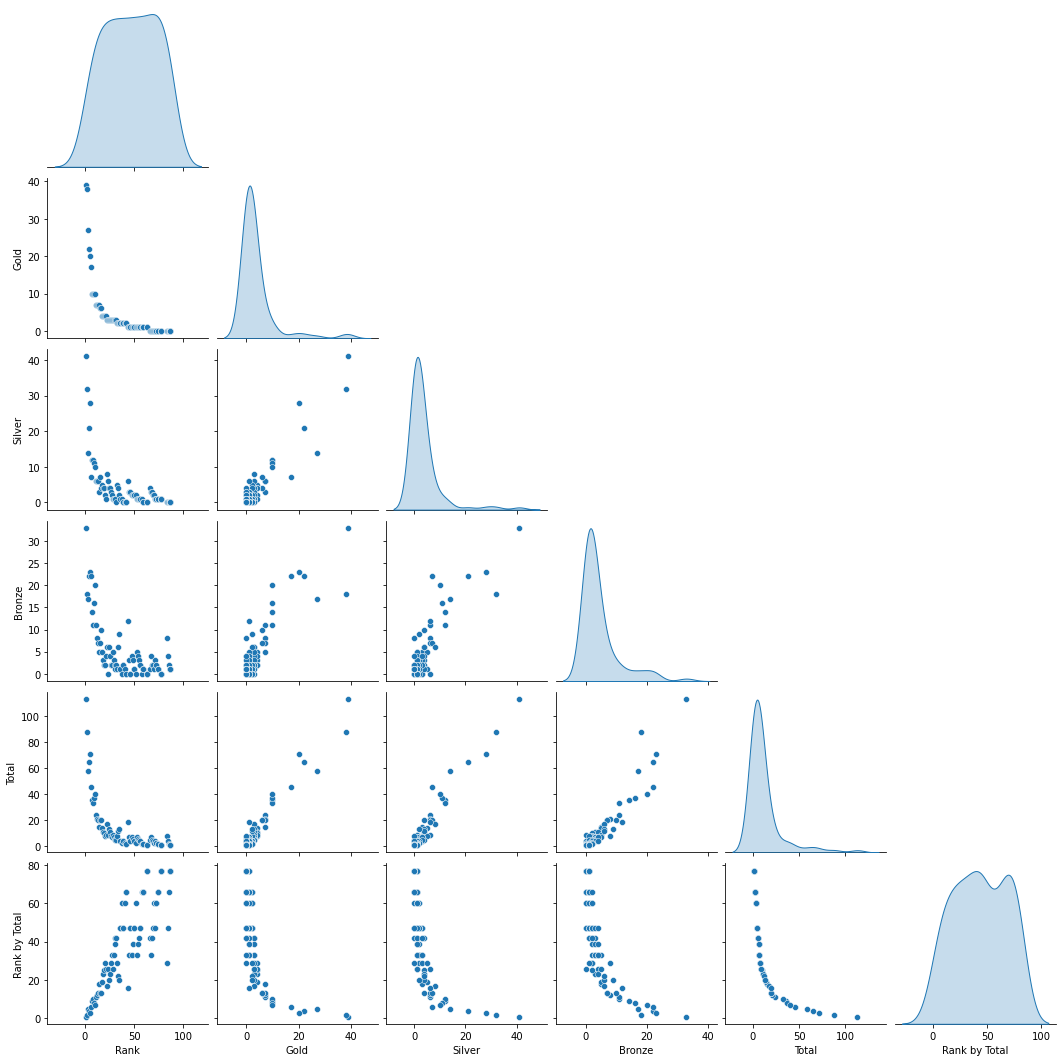

In [43]:
sns.pairplot(data=medals, corner = True, kind = "scatter", diag_kind = "kde")


In [37]:
px.bar(medals.sort_values(by="Total", ascending=False)[:20], x="Team/NOC", y="Total",
      title="Top 20 countries by total medal count.")

In [38]:
pie_data = medals.copy()
top10 = medals.sort_values(by="Total", ascending=False)[:10]["Team/NOC"]

pie_data.loc[~pie_data["Team/NOC"].isin(top10), "Team/NOC"] = 'other'

px.pie(pie_data, names="Team/NOC", values="Total",
      title="Total Share of in total medals from top 10 countries", hole=.75)

In [39]:
px.bar(medals.sort_values(by="Gold", ascending=False)[:20], x="Team/NOC", y="Gold",
      title="Top 20 countries to win most Gold medals.")

In [40]:
pie_data = medals.copy()
top10 = medals.sort_values(by="Gold", ascending=False)[:10]["Team/NOC"]

pie_data.loc[~pie_data["Team/NOC"].isin(top10), "Team/NOC"] = 'other'

px.pie(pie_data, names="Team/NOC", values="Gold",
      title="Total Share of in gold medals from top 10 countries", hole=.75)

In [44]:
medals

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [52]:
medals["Team/NOC", 4] = "Russia"

total = medals["Total"]
gold = medals["Gold"]
silver = medals["Silver"]
bronze = medals["Bronze"]

labels = medals["Team/NOC"]
ranks = medals["Rank"]


 
fig = px.scatter_geo(locations = labels, 
                     hover_name = labels, 
                     locationmode = 'country names', 
                     size = total, 
                     color = labels, 
                     hover_data = {"Gold Medals" : gold, "Silver Medals" : silver, "Bronze Medals" : bronze, "Rank" : ranks},
                     labels={"size": "Total"},
                     projection = "natural earth")

fig.update_layout(title = "Olympic teams rating interactive map.", legend_title = "Legend")

fig.show()